### Monte Carlo Simulation

    A Monte Carlo simulation is a technique used to understand the range of possible outcomes for uncertain events. Instead of just looking at what actually happens in real life (one single outcome), it helps us explore all the possibilities.

### Why Monte Carlo is Useful

In real life, we only see one outcome, which doesn’t tell us the probability of different outcomes. Monte Carlo simulations generate a large number of hypothetical but realistic outcomes using:

   1.The **mean** (average) of past data\
   2.The **variance** (how much the data varies)

In short: Monte Carlo simulation takes real-world uncertainty, uses historical data to simulate many possible outcomes, and helps businesses make smarter decisions.

##### Analyze the results:

Maximum revenue

Minimum revenue

Average (expected) revenue

### 1. Stock Price as a Function of Log Returns
\\[
S_t = S_{t-1} \cdot e^{R_t}
\\]

**2. Logarithmic Returns (Daily Returns)**

\\[
R_t = \ln \frac{S_t}{S_{t-1}}
\\]

**3. Drift Component**

\\[
\text{drift} = \mu - \frac{1}{2} \sigma^2
\\]

μ = average daily return of the stock
𝜎 = variance of daily returns

**4. Random Component (Brownian Motion)**

\\[
\text{shock} = \sigma \cdot Z
\\]

𝜎 = standard deviation of daily returns (volatility)

Z = random variable from standard normal distribution N(0,1)

**5. Geometric Brownian Motion (GBM) Formula**

\\[
S_t = S_{t-1} \cdot \exp\left( \text{drift} + \text{shock} \right)
\\]
    Combining drift and random component gives the Monte Carlo formula for stock price evolution:

**6. Iterative Simulation**

\\[
S_{t+1} = S_t \cdot e^{\text{drift} + \sigma Z_{t+1}}, \quad t = 0,1,2,\dots,n-1
\\]
    Repeat this for many paths (e.g., 1000 simulations) to assess possible price outcomes.

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline
import yfinance as yf

In [2]:
ticker = 'MSFT'  
data = pd.DataFrame()
assets = ['MSFT']  # P&G and S&P 500
data = yf.download(assets, start="2000-01-01")["Close"]

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_28884\2124833228.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start="2000-01-01")["Close"]
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Ticker,MSFT
Date,
2000-01-03,35.668087
2000-01-04,34.463203
2000-01-05,34.826580
2000-01-06,33.659962
2000-01-07,34.099850


In [4]:
data.tail()

Ticker,MSFT
Date,
2025-08-25,504.260010
2025-08-26,502.040009
2025-08-27,506.739990
2025-08-28,509.640015
2025-08-29,506.690002


In [5]:
log_returns = np.log(1 + data.pct_change())

In [6]:
log_returns.tail()

Ticker,MSFT
Date,
2025-08-25,-0.005873
2025-08-26,-0.004412
2025-08-27,0.009318
2025-08-28,0.005707
2025-08-29,-0.005805


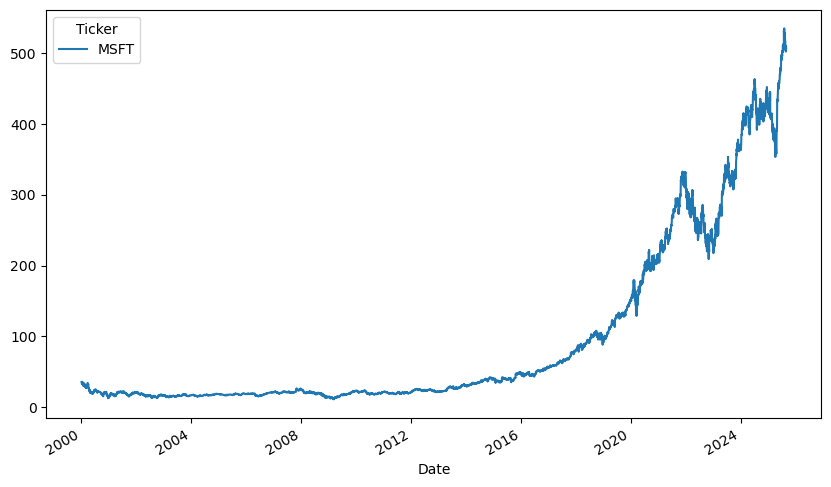

In [7]:
data.plot(figsize=(10, 6));

In [8]:
r = 0.025

In [9]:
stdev = log_returns.std() * 250 ** 0.5
stdev

Ticker
MSFT    0.3
dtype: float64

In [10]:
type(stdev)

pandas.core.series.Series

In [11]:
stdev = stdev.values
stdev

array([0.30000015])

In [12]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [13]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [14]:
S0

Ticker
MSFT    506.690002
Name: 2025-08-29 00:00:00, dtype: float64

In [15]:
S

array([[506.69000244, 506.69000244, 506.69000244, ..., 506.69000244,
        506.69000244, 506.69000244],
       [502.1016574 , 494.74645933, 498.58297374, ..., 511.4156967 ,
        497.41582159, 504.30439441],
       [489.36000583, 486.10715956, 494.89856059, ..., 506.62573365,
        490.16785302, 498.18312814],
       ...,
       [508.99752486, 513.47480789, 340.41723491, ..., 224.414886  ,
        520.71175713, 520.89497024],
       [508.19143997, 502.95616679, 329.33333989, ..., 225.501016  ,
        509.17313248, 520.60962401],
       [511.94980762, 489.44747437, 333.76490796, ..., 225.15411813,
        496.30982974, 511.30273991]])

In [16]:
S.shape

(251, 10000)

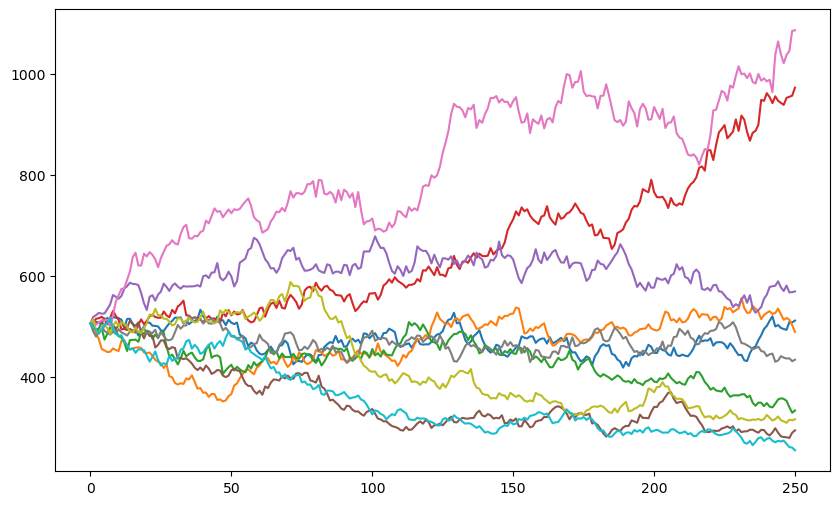

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [18]:
p = np.maximum(S[-1] - 110, 0)

In [19]:
p

array([401.94980762, 379.44747437, 223.76490796, ..., 115.15411813,
       386.30982974, 401.30273991])

In [20]:
p.shape

(10000,)

In [21]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

399.96105902495174